# Part One 

### 1) Import pandas with the right name

In [353]:
import pandas as pd

### 2) Set all graphics from matplotlib to display inline

In [354]:
!pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
plt.style.use('ggplot')

### 3) Read the csv in (it should be UTF-8 already so you don't have to worry about encoding), save it with the proper boring name

In [355]:
df = pd.read_csv("07-hw-animals copy.csv")

### 4) Display the names of the columns in the csv

In [356]:
df.columns.values

array(['animal', 'name', 'length'], dtype=object)

### 5) Display the first 3 animals.

In [357]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


### 6) Sort the animals to see the 3 longest animals.

In [358]:
df.sort_values(by='length', ascending = False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


### 7) What are the counts of the different values of the "animal" column? a.k.a. how many cats and how many dogs.


In [359]:
df['animal'].value_counts()

cat    3
dog    3
Name: animal, dtype: int64

### 8) Only select the dogs.

In [360]:
df[df['animal'] == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


### 9) Display all of the animals that are greater than 40 cm.

In [361]:
df[df['length']>40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


### 10) 'length' is the animal's length in cm. Create a new column called inches that is the length in inches.

In [362]:
df['inches'] = df['length']*0.393701

### 11) Save the cats to a separate variable called "cats." Save the dogs to a separate variable called "dogs."


In [363]:
cats = df[df['animal'] =='cat']
dogs = df[df['animal'] == 'dog']

### 12) Display all of the animals that are cats and above 12 inches long. First do it using the "cats" variable, then do it using your normal dataframe.


In [364]:
cats[cats['inches']>12]

,animal,name,length,inches
0,cat,Anne,35,13.779535
1,cat,Bob,45,17.716545
4,cat,Charlie,32,12.598432


In [365]:
df[(df['animal']=='cat') & (df['inches']>12)]

,animal,name,length,inches
0,cat,Anne,35,13.779535
1,cat,Bob,45,17.716545
4,cat,Charlie,32,12.598432


### 13) What's the mean length of a cat?

In [366]:
cats.describe()

,length,inches
count,3.000000,3.000000
mean,37.333333,14.698171
std,6.806859,2.679867
min,32.000000,12.598432
25%,33.500000,13.188984
50%,35.000000,13.779535
75%,40.000000,15.748040
max,45.000000,17.716545


the mean length of a cat is 14.698 inches 

### 14) What's the mean length of a dog?

In [367]:
dogs.describe()

,length,inches
count,3.0,3.000000
mean,50.0,19.685050
std,15.0,5.905515
min,35.0,13.779535
25%,42.5,16.732292
50%,50.0,19.685050
75%,57.5,22.637808
max,65.0,25.590565


the mean length of a dog is 19.685

### 15) Use groupby to accomplish both of the above tasks at once.

In [368]:
df.groupby('animal').mean()

,length,inches
animal,,
cat,37.333333,14.698171
dog,50.000000,19.685050


### 16) Make a histogram of the length of dogs. I apologize that it is so boring.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1126a2390>]], dtype=object)

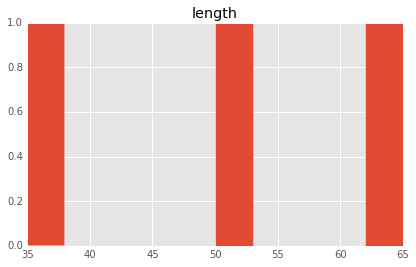

In [369]:
dogs.hist('length')

### 17) Change your graphing style to be something else (anything else!)

['fivethirtyeight', 'bmh', 'seaborn-dark-palette', 'classic', 'seaborn-whitegrid', 'seaborn-paper', 'seaborn-deep', 'seaborn-white', 'seaborn-muted', 'seaborn-notebook', 'seaborn-dark', 'seaborn-darkgrid', 'dark_background', 'ggplot', 'seaborn-bright', 'seaborn-ticks', 'seaborn-talk', 'seaborn-pastel', 'seaborn-colorblind', 'grayscale', 'seaborn-poster']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112bb2978>]], dtype=object)

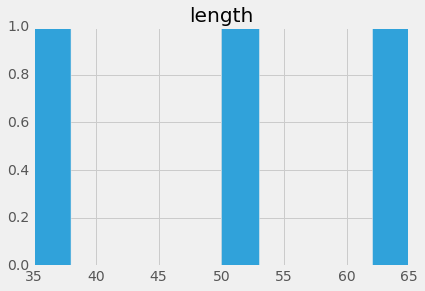

In [370]:
print(style.available)
plt.style.use('fivethirtyeight')
dogs.hist('length')

### 18) Make a horizontal bar graph of the length of the animals, with their name as the label (look at the billionaires notebook I put on Slack!)

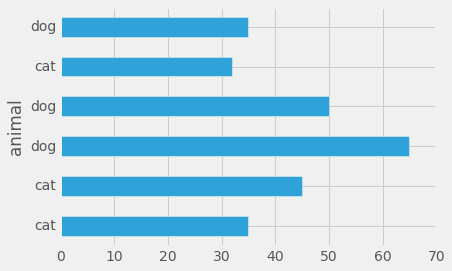

In [371]:
df.plot(kind='barh', x='animal', y='length', legend=False)

### 19) Make a sorted horizontal bar graph of the cats, with the larger cats on top.


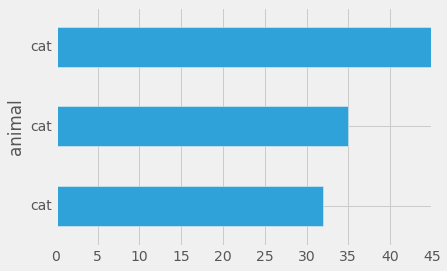

In [372]:
sortedcats = cats.sort_values(by='length', ascending = True)

sortedcats.plot(kind='barh', x='animal', y='length', legend=False)

# Part Two

### Read in data on billionaires 

In [373]:
df = pd.read_excel('billionaires copy.xlsx')
df.columns.values

array(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance',
       'sector', 'company', 'companytype', 'relationshiptocompany',
       'foundingdate', 'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2',
       'source', 'source_2', 'source_3', 'source_4'], dtype=object)

In [374]:
recent = df[df['year']==2014]
recent.head(5)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
5,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
6,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
8,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
9,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


### 1) What country are most billionaires from? For the top ones, how many billionaires per billion people?

In [375]:
top_df = pd.DataFrame(recent['countrycode'].value_counts().head())
top_df.index.names = ['countrycode']
top_df['num_billionaires'] = top_df.countrycode 
top_df.pop('countrycode')

# print(top_df)

pop_df = pd.DataFrame([
    {'population':318900000},
    {'population':1357000000},
    {'population':143500000},
    {'population':80620000},
    {'population':200400000}
    ], index = ['USA', 'CHN', 'RUS', 'DEU', 'BRA'])

pop_df.index.names = ['countrycode']

pop_df['pop_in_billions'] = pop_df['population']/1000000000


# print(pop_df)


result = pd.merge(pop_df, top_df, left_index=True, right_index=True)
result['billionaires_per_billionppl'] = result['num_billionaires']/result['pop_in_billions']
print(result)





             population  pop_in_billions  num_billionaires  \
countrycode                                                  
USA           318900000          0.31890               499   
CHN          1357000000          1.35700               152   
RUS           143500000          0.14350               111   
DEU            80620000          0.08062                85   
BRA           200400000          0.20040                65   

             billionaires_per_billionppl  
countrycode                               
USA                          1564.753841  
CHN                           112.011791  
RUS                           773.519164  
DEU                          1054.328951  
BRA                           324.351297  


### 2) Who are the top 10 richest billionaires?

In [376]:
recent.sort_values(by='networthusbillion', ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
284,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
348,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
124,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
2491,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
1377,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
509,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
381,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
2185,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
429,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
1128,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


### 3) What's the average wealth of a billionaire? Male? Female?

In [377]:
recent.groupby('gender')['networthusbillion'].mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

### 4) Who is the poorest billionaire? Who are the top 10 poorest billionaires?


In [378]:
recent.sort_values('networthusbillion').head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
234,2014,B.R. Shetty,1565,India,IND,1.0,self-made,founder non-finance,male,72.0,...,founder,1975.0,NaN,healthcare,NaN,NaN,http://en.wikipedia.org/wiki/B._R._Shetty,http://www.nmchealth.com/dr-br-shetty/,NaN,NaN
2092,2014,Rostam Azizi,1565,Tanzania,TZA,1.0,self-made,executive,male,49.0,...,investor,1999.0,NaN,"telecom, investments",NaN,NaN,http://www.forbes.com/profile/rostam-azizi/,http://en.wikipedia.org/wiki/Vodacom_Tanzania,http://www.thecitizen.co.tz/News/Rostam--Dewji...,NaN
2401,2014,Tory Burch,1565,United States,USA,1.0,self-made,founder non-finance,female,47.0,...,founder,2004.0,NaN,fashion,NaN,NaN,http://en.wikipedia.org/wiki/J._Christopher_Burch,http://www.vanityfair.com/news/2007/02/tory-bu...,NaN,NaN
734,2014,Fred Chang,1565,United States,USA,1.0,self-made,founder non-finance,male,57.0,...,founder,2001.0,NaN,online retailing,NaN,NaN,http://en.wikipedia.org/wiki/Newegg,http://www.newegg.com/Info/FactSheet.aspx,http://www.forbes.com/sites/andreanavarro/2014...,NaN
171,2014,Angela Bennett,1565,Australia,AUS,1.0,inherited,inherited,female,69.0,...,relation,1955.0,NaN,mining,inherited from father,shared fortune with brother,http://www.forbes.com/profile/angela-bennett/,NaN,NaN,NaN
748,2014,Fu Kwan,1565,China,CHN,1.0,self-made,self-made finance,male,56.0,...,chairman,1990.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/fu-kwan/,http://www.macrolink.com.cn/en/AboutBig.aspx,NaN,NaN
2107,2014,Ryan Kavanaugh,1565,United States,USA,1.0,self-made,founder non-finance,male,39.0,...,founder,2004.0,NaN,Movies,NaN,NaN,http://en.wikipedia.org/wiki/Ryan_Kavanaugh,http://en.wikipedia.org/wiki/Relativity_Media,http://www.vanityfair.com/news/2010/03/kavanau...,NaN
1783,2014,O. Francis Biondi,1565,United States,USA,1.0,self-made,self-made finance,male,49.0,...,founder,1995.0,NaN,hedge fund,NaN,NaN,http://www.forbes.com/profile/o-francis-biondi/,http://www.forbes.com/sites/nathanvardi/2014/0...,NaN,NaN
1371,2014,Lam Fong Ngo,1565,Macau,MAC,1.0,self-made,self-made finance,female,NaN,...,Vice Chairman,1997.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/david-chow-1/,http://www.macaulegend.com/html/about_mileston...,Macau Legend to roll the dice on HK IPO; But l...,NaN
702,2014,Feng Hailiang,1565,China,CHN,1.0,self-made,founder non-finance,male,53.0,...,founder,1989.0,NaN,copper processing & real estate,NaN,NaN,http://www.forbes.com/profile/feng-hailiang/,http://www.hailiang.com/en/about_int.php,NaN,NaN


### 5) 'What is relationship to company'? And what are the most common relationships?


In [379]:
recent.groupby('relationshiptocompany')['relationshiptocompany'].count()

relationshiptocompany
CEO                                                 8
COO                                                 1
Chairman                                            8
Chairman and Chief Executive Officer               15
Chairman, CEO                                       1
Chairman/founder                                    1
Chairman/shareholder                                1
Chief Executive                                     2
Exectuitve Director                                 1
Global Head of Real Estate                          1
Head of Board of Directors                          1
Honorary President for Life                         1
Relation                                            3
Vice Chairman                                       3
Vice President                                      1
Vice President of Infrastructure Software           1
ceo                                                 8
chairman                                           64
chairm

### 6) Most common source of wealth? Male vs. female?


In [380]:
recent['sourceofwealth'].groupby(recent['gender']).describe()
# diversified for female
# real estate for male 

gender        
female  count             172
        unique            100
        top       diversified
        freq                9
male    count            1464
        unique            578
        top       real estate
        freq              100
Name: sourceofwealth, dtype: object

### 7) Given the richest person in a country, what % of the GDP is their wealth?


In [381]:
# read in sheet where i compiled countries GDPs by countrycodes 
GDP = pd.read_excel('billionaires copy.xlsx', sheetname = 'Sheet3')

# merge data with recent billionaires data
merge = pd.merge(recent, GDP, on='countrycode')

# select necessary columns
col_list = ['name', 'countrycode', 'networthusbillion', 'GDPinmillions']

# save columns to new dataframe
result = merge[col_list]

# calculate wealth as a percent of country GDP 
result['pct_GDP_byperson'] = ((result['networthusbillion']*1000)/result['GDPinmillions'])*100

# max_bycountry stores TRUE/FALSE: has max billions in a country
result['max_bycountry'] = result.groupby(['countrycode'])['networthusbillion'].transform(max) == result['networthusbillion']

# interate over dataframe to print max billions and the percentage max billions is of GDP 
# for each country
for index, row in result.iterrows(): 
    if row['max_bycountry']: 
        print('For', row['countrycode'], 'the richest person has', row['networthusbillion'], 'billion dollars,', 'which is', '{:,.4}'.format(row['pct_GDP_byperson']), 'percent of the GDP.')


For USA the richest person has 76.0 billion dollars, which is 0.4235 percent of the GDP.
For ARE the richest person has 4.8 billion dollars, which is 1.389 percent of the GDP.
For SAU the richest person has 20.4 billion dollars, which is 3.123 percent of the GDP.
For NGA the richest person has 25.0 billion dollars, which is 5.1 percent of the GDP.
For BRA the richest person has 19.7 billion dollars, which is 1.111 percent of the GDP.
For IDN the richest person has 7.6 billion dollars, which is 0.8848 percent of the GDP.
For IND the richest person has 18.6 billion dollars, which is 0.8897 percent of the GDP.
For TUR the richest person has 3.7 billion dollars, which is 0.5043 percent of the GDP.
For RUS the richest person has 18.6 billion dollars, which is 1.404 percent of the GDP.
For JPN the richest person has 18.4 billion dollars, which is 0.4462 percent of the GDP.
For CAN the richest person has 22.6 billion dollars, which is 1.456 percent of the GDP.
For FRA the richest person has 3

/Users/mercyemelike/.virtualenvs/data_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mercyemelike/.virtualenvs/data_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### 8) Add up the wealth of all of the billionaires in a given country (or a few countries) and then compare it to the GDP of the country, or other billionaires, so like pit the US vs India


In [488]:
# sum by country
result['tot_bycountry'] = result.groupby(['countrycode'])['networthusbillion'].transform(sum)

# find percent of GDP
result['pct_GDP_bycountry'] = ((result['tot_bycountry']*1000)/result['GDPinmillions'])*100

# TRUE/FALSE: first occurence of a country
result['duplicated'] = result.duplicated('countrycode')

# print sum of total billionaire wealth and its percentage of GDP by country 
for index, row in result.iterrows(): 
    if not row['duplicated']: 
        print("The sum of every billionaire's wealth in", row['countrycode'], 'is', '{:,.6}'.format(row['tot_bycountry']), 'billion, which is', '{:,.4}'.format(row['pct_GDP_bycountry']), 'percent of the GDP.')




/Users/mercyemelike/.virtualenvs/data_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/mercyemelike/.virtualenvs/data_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mercyemelike/.virtualenvs/data_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

The sum of every billionaire's wealth in USA is 2,322.4 billion, which is 12.94 percent of the GDP.
The sum of every billionaire's wealth in ARE is 14.6 billion, which is 4.226 percent of the GDP.
The sum of every billionaire's wealth in SAU is 49.0 billion, which is 7.501 percent of the GDP.
The sum of every billionaire's wealth in NGA is 33.3 billion, which is 6.793 percent of the GDP.
The sum of every billionaire's wealth in BRA is 192.2 billion, which is 10.84 percent of the GDP.
The sum of every billionaire's wealth in IDN is 47.8 billion, which is 5.565 percent of the GDP.
The sum of every billionaire's wealth in IND is 191.9 billion, which is 9.179 percent of the GDP.
The sum of every billionaire's wealth in TUR is 43.2 billion, which is 5.888 percent of the GDP.
The sum of every billionaire's wealth in RUS is 422.5 billion, which is 31.89 percent of the GDP.
The sum of every billionaire's wealth in JPN is 101.0 billion, which is 2.45 percent of the GDP.
The sum of every billion

### 9) What are the most common industries for billionaires to come from? What's the total amount of billionaire money from each industry?


In [383]:
recent['industry'].value_counts().head(10)

Consumer                   291
Real Estate                190
Retail, Restaurant         174
Diversified financial      132
Technology-Computer        131
Money Management           122
Media                      104
Energy                      87
Non-consumer industrial     83
Technology-Medical          78
Name: industry, dtype: int64

In [384]:
recent['networthusbillion'].groupby(recent['industry']).sum()

industry
0                                     7.6
Constrution                         175.4
Consumer                           1177.8
Diversified financial               614.4
Energy                              340.5
Hedge funds                         167.2
Media                               490.5
Mining and metals                   240.6
Money Management                    381.3
Non-consumer industrial             298.4
Other                               179.3
Private equity/leveraged buyout      71.9
Real Estate                         573.8
Retail, Restaurant                  820.9
Technology-Computer                 684.6
Technology-Medical                  218.0
Venture Capital                      11.1
Name: networthusbillion, dtype: float64

### 10) How many self made billionaires vs. others?


In [385]:
recent['selfmade'].groupby(recent['selfmade']).count()

selfmade
inherited     505
self-made    1146
Name: selfmade, dtype: int64

### 11) How old are billionaires? How old are billionaires self made vs. non self made? or different industries?


In [423]:
#how old are billionaires 
recent['age'].dropna().describe()

count    1590.000000
mean       63.342138
std        13.137743
min        24.000000
25%        53.000000
50%        63.000000
75%        73.000000
max        98.000000
Name: age, dtype: float64

In [426]:
#how old are billionaires self made vs inherited 
recent['age'].dropna().groupby(recent['selfmade']).describe()

selfmade        
inherited  count     476.000000
           mean       64.962185
           std        13.174403
           min        24.000000
           25%        56.000000
           50%        65.000000
           75%        74.000000
           max        98.000000
self-made  count    1112.000000
           mean       62.625899
           std        13.054631
           min        29.000000
           25%        52.000000
           50%        62.000000
           75%        72.000000
           max        96.000000
Name: age, dtype: float64

In [428]:
# how old are billionaires by industry
recent['age'].dropna().groupby(recent['industry']).describe()

industry                    
0                      count      5.000000
                       mean      63.600000
                       std       14.170392
                       min       49.000000
                       25%       53.000000
                       50%       63.000000
                       75%       68.000000
                       max       85.000000
Constrution            count     58.000000
                       mean      64.965517
                       std       14.234829
                       min       33.000000
                       25%       55.000000
                       50%       65.000000
                       75%       78.750000
                       max       92.000000
Consumer               count    276.000000
                       mean      64.735507
                       std       12.952177
                       min       29.000000
                       25%       56.000000
                       50%       64.000000
                       75

### 12) Who are the youngest billionaires? The oldest? Age distribution - maybe make a graph about it?


/Users/mercyemelike/.virtualenvs/data_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mercyemelike/.virtualenvs/data_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Oldest billionaire: David Rockefeller, Sr. / 98.0 years old
Youngest billionaire: Perenna Kei / 24.0 years old


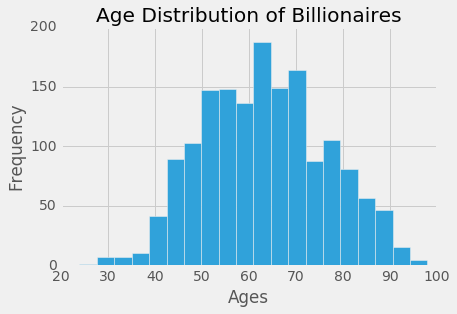

In [469]:
ax = recent['age'].hist(bins=20)
ax.set_xlabel('Ages')
ax.set_ylabel('Frequency')
plt.title('Age Distribution of Billionaires')


recent['min_age'] = min(recent['age'])
recent['max_age'] = max(recent['age'])

for index, row in recent.iterrows(): 
    if row['age'] == row['min_age']:
        print ('Youngest billionaire:', row['name'], '/', row['age'], 'years old')
    if row['age'] == row['max_age']: 
        print ('Oldest billionaire:', row['name'], '/', row['age'], 'years old')

### 13) Maybe just make a graph about how wealthy they are in general?


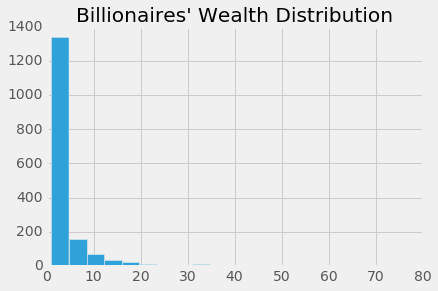

In [537]:
ax = recent['networthusbillion'].hist(bins=20)
plt.title("Billionaires' Wealth Distribution")

### 14) Maybe plot their net worth vs age (scatterplot)


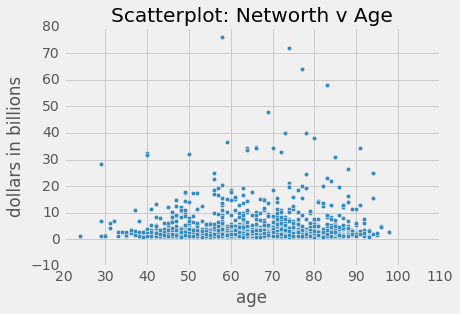

In [487]:
ax = recent.plot.scatter('age','networthusbillion')
ax.set_ylabel('dollars in billions')
plt.title('Scatterplot: Networth v Age')

### 15) Make a bar graph of the top 10 or 20 richest


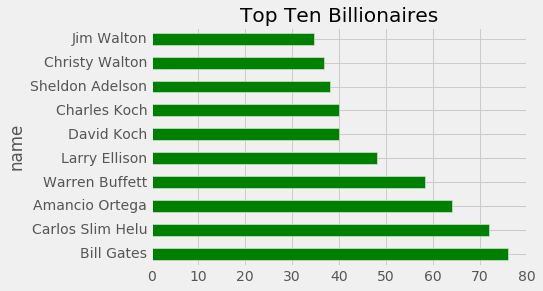

In [533]:
indexed = recent.set_index('name')
selected = indexed[['networthusbillion']]

ax = selected.sort_values(['networthusbillion'], ascending=False)[:10].plot.barh(bottom=['name'],color='green')
ax.legend_.remove()
plt.title('Top Ten Billionaires')